In [2]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
import pylab as plt
import geocoder
ox.config(log_console=True, use_cache=True)

In [3]:
img_folder = 'images'
extension = 'png'
size = 240

/anaconda3/envs/geo5/lib/python3.6/site-packages/osmnx/buildings.py:347: FutureWarning: The buildings module has been deprecated, please use the footprints module instead.
  'footprints module instead.', FutureWarning)
/anaconda3/envs/geo5/lib/python3.6/site-packages/osmnx/buildings.py:166: FutureWarning: The buildings module has been deprecated, please use the footprints module instead.
  'footprints module instead.', FutureWarning)
/anaconda3/envs/geo5/lib/python3.6/site-packages/osmnx/buildings.py:64: FutureWarning: The buildings module has been deprecated, please use the footprints module instead.
  'footprints module instead.', FutureWarning)
/anaconda3/envs/geo5/lib/python3.6/site-packages/osmnx/buildings.py:394: FutureWarning: The buildings module has been deprecated, please use the footprints module instead.
  'footprints module instead.', FutureWarning)


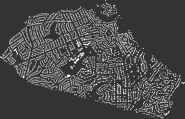

In [3]:
gdf = ox.buildings_from_place(place='Piedmont, California, USA')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_buildings(gdf_proj, bgcolor='#333333', color='w', 
                            save=True, show=False, close=True, filename='piedmont_bldgs', dpi=40)
Image('{}/{}.{}'.format(img_folder, 'piedmont_bldgs', extension), height=size, width=size)

In [4]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(place, point, network_type='drive', bldg_color='orange', dpi=40,
              dist=805, default_width=6, street_widths=None):
    gdf = ox.buildings_from_point(point=point, distance=dist)
    gdf_proj = ox.project_gdf(gdf)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.plot_buildings(gdf_proj, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)
    return(gdf_proj)

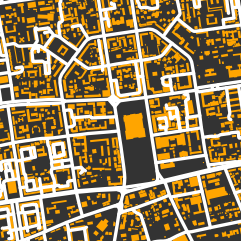

In [48]:
place = 'Ulaan Baatar center'
point = (47.920892, 106.916130)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [ ]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

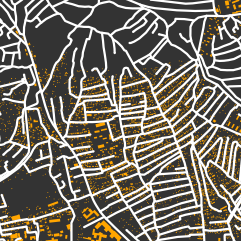

In [18]:
place = 'Ulaan Baatar yurt district'
point = (47.935789, 106.890692)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [ ]:
place = 'Ulaan Baatar yurt district'
point = (47.935789, 106.890692)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

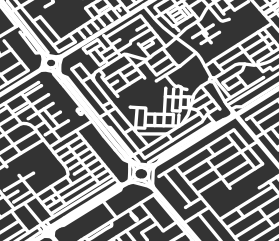

In [7]:
place = 'New Delhi'
point = (30.729570,76.768299)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

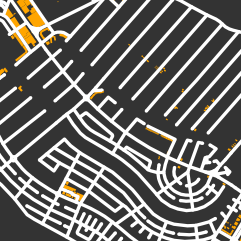

In [40]:
place = 'Porto Alegre'
point = (42.250191, 3.115340)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

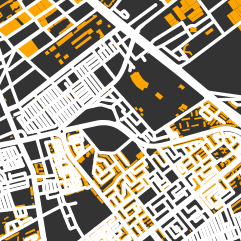

In [41]:
place = 'Casablanca'
point = (33.573109, -7.589843)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

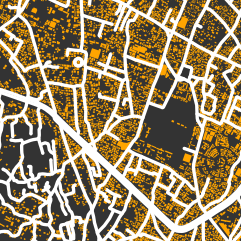

In [42]:
place = 'Lalitpur'
point = (27.664400, 85.318794)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

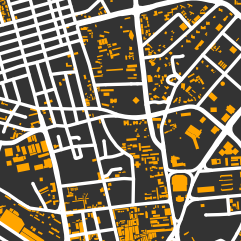

In [44]:
place = 'Accra'
point = (5.555560, -0.207063)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

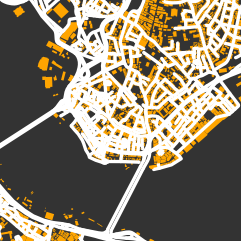

In [47]:
place = 'Istanbul'
point = (41.024699, 28.972893)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

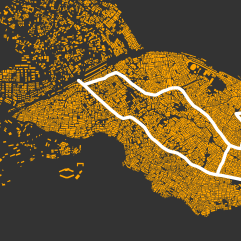

In [49]:
place = 'Nairobi (Kibera)'
point = (-1.313620, 36.790170)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [67]:
def plot_radar(city):
    G = ox.graph_from_place(city, network_type='drive')
    
    G = ox.add_edge_bearings(G)
    bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
    ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
    xlim = ax.set_xlim(0, 360)
    ax.set_title('{} street network edge bearings'.format(city))
    plt.show()
    
    n = 30
    bearings = bearings[bearings>0]
    count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
    division = division[0:-1]
    width =  2 * np.pi/n
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')
    bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
    ax.set_title('{} street network edge bearings'.format(city), y=1.1)
    plt.show()
    
    return(ax)

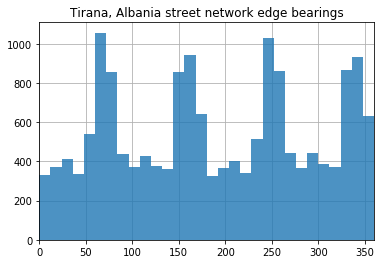

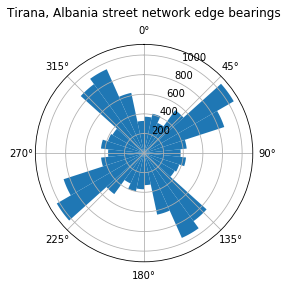

In [68]:
plot_radar('Tirana, Albania')

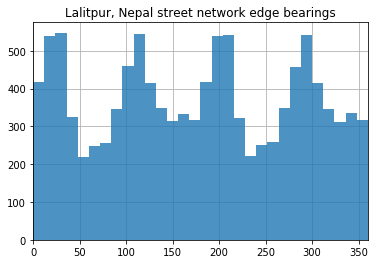

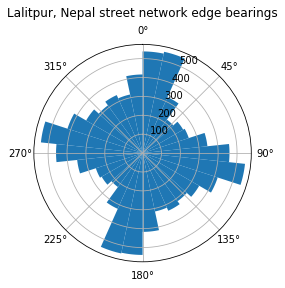

In [69]:
plot_radar('Lalitpur, Nepal')

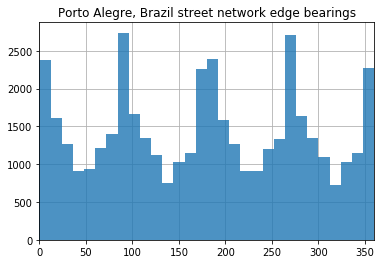

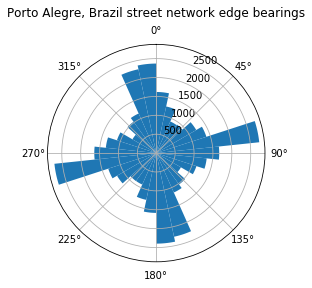

In [70]:
plot_radar('Porto Alegre, Brazil')

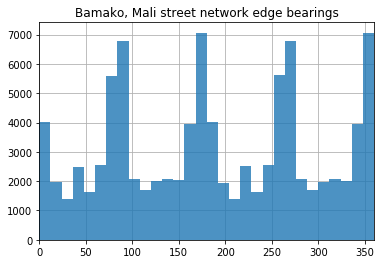

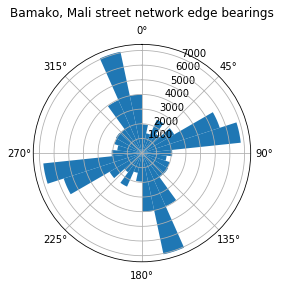

In [71]:
plot_radar('Bamako, Mali')

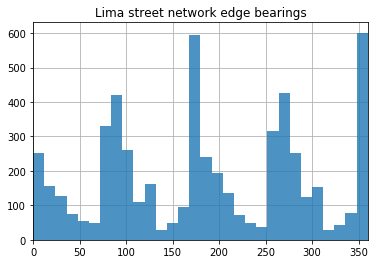

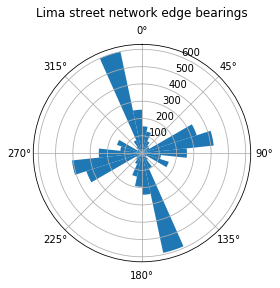

In [75]:
plot_radar('Lima')

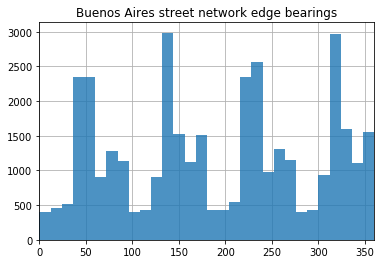

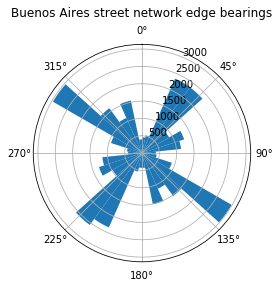

In [77]:
plot_radar('Buenos Aires')

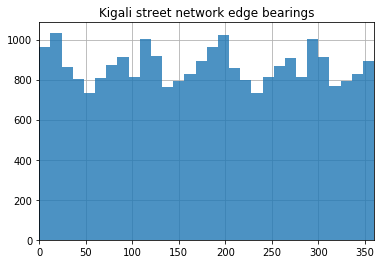

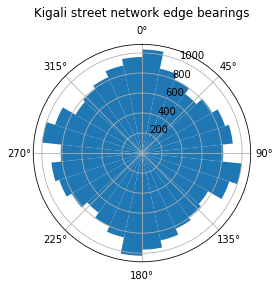

In [78]:
plot_radar('Kigali')

In [ ]:
plot_radar('Haiphong')

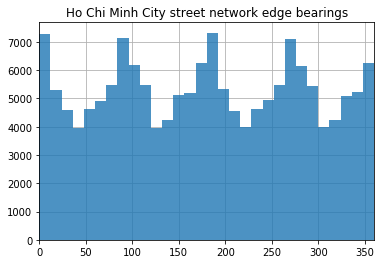

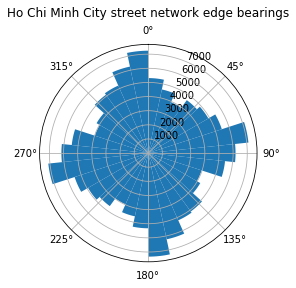

In [81]:
plot_radar('Ho Chi Minh City')

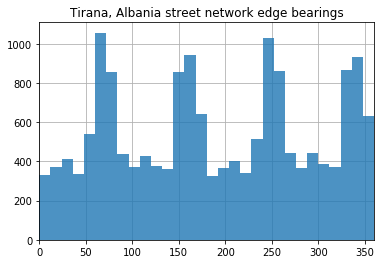

In [64]:
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
ax.set_xlim(0, 360)
ax.set_title('{} street network edge bearings'.format(city))
plt.show()

In [62]:
bearings

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
16607    True
16608    True
16609    True
16610    True
16611    True
16612    True
16613    True
16614    True
16615    True
16616    True
16617    True
16618    True
16619    True
16620    True
16621    True
16622    True
16623    True
16624    True
16625    True
16626    True
16627    True
16628    True
16629    True
16630    True
16631    True
16632    True
16633    True
16634    True
16635    True
16636    True
Length: 16637, dtype: bool

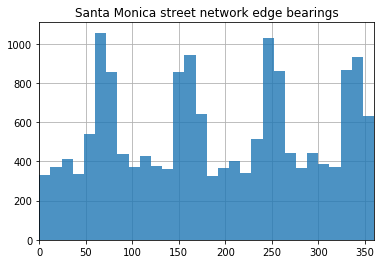

In [63]:
city = 'Tirana, Albania'
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
ax.set_xlim(0, 360)
ax.set_title('Santa Monica street network edge bearings')
plt.show()

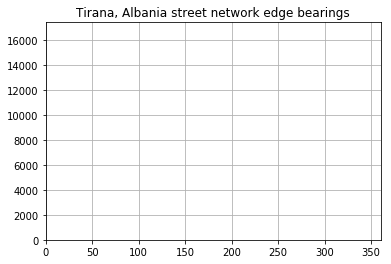

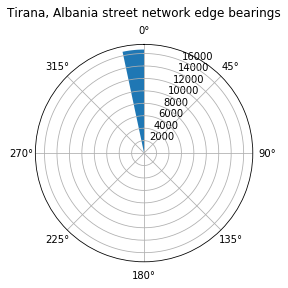

In [56]:
ax = plot_radar('Tirana, Albania')
plt.show()

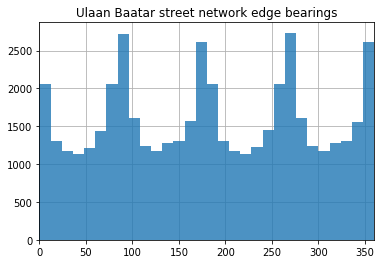

In [32]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('{} street network edge bearings'.format(city))
plt.show()

In [36]:
bearings = bearings[bearings>0]

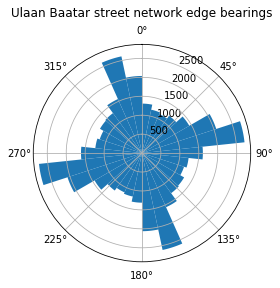

In [38]:
# polar plot
import numpy as np
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Ulaan Baatar street network edge bearings', y=1.1)
plt.show()